In [1]:
import os
import warnings
# suppress warning
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
raw_dir = ['../dataset/mp_data/voltage_2020_08_05.csv']
target_dir = ['../regression/result/dnn_2020_09_25/1234']
prefix = 'Na_test_dnn_best_'

In [3]:
def show_diff(dir_name):
    raw_data = pd.read_csv(raw_dir[0])
    raw_data['volume_change'] = 100 / (1 + raw_data['max_delta_volume'].values)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_Na_pred_value.csv'), index_col=0)
    pred_data['diff'] = pred_data['test_pred'] - pred_data['test_ground_truth']
    pred_data['diff_abs'] = abs(pred_data['diff'])
    pred_data = pred_data.sort_values(by=['diff_abs'], ascending=False)
    concat_data = pd.merge(pred_data, raw_data, left_on='raw_index', right_on='Unnamed: 0')
    return concat_data
   
show_cols = [
    'test_ground_truth', 'test_pred', 'raw_index', 'diff', 'diff_abs', 'formula_charge', 
    'formula_discharge', 'max_delta_volume', 'volume_change',
]
concat_data = show_diff(target_dir[0])
concat_data[show_cols][0:15]

,test_ground_truth,test_pred,raw_index,diff,diff_abs,formula_charge,formula_discharge,max_delta_volume,volume_change
0,3.127670,4.925206,3880,1.797536,1.797536,Cs2MnF6,Cs2NaMnF6,0.088333,91.883664
1,1.779477,3.399832,4196,1.620355,1.620355,Na4Cr2C4SO16,Na6Cr2C4SO16,0.039853,96.167442
2,2.389452,3.815498,4046,1.426046,1.426046,MnO2,NaMn2O4,0.074147,93.097153
3,2.828208,4.141479,4288,1.313272,1.313272,Na3(NiO2)5,Na4(NiO2)5,0.014347,98.585547
4,2.695634,3.900216,3807,1.204581,1.204581,Na2Ni2O5,Na3Ni2O5,0.038114,96.328550
5,2.504311,3.655552,4413,1.151241,1.151241,NaCrCSO7,Na2CrCSO7,0.082532,92.376063
6,2.816984,3.870788,4052,1.053803,1.053803,NaMn4O8,NaMn2O4,0.000353,99.964753
7,3.067704,4.081501,4195,1.013797,1.013797,Ca9Co(PO4)7,NaCa9Co(PO4)7,0.000045,99.995459
8,2.703531,3.712069,4369,1.008538,1.008538,Fe7(PO4)6,NaFe7(PO4)6,0.013295,98.687945
9,3.723081,2.715018,4121,-1.008064,1.008064,Mo3P3O13,NaMo3P3O13,0.000887,99.911369


In [4]:
concat_data[concat_data['test_ground_truth'] > 4.0][show_cols][0:10]

,test_ground_truth,test_pred,raw_index,diff,diff_abs,formula_charge,formula_discharge,max_delta_volume,volume_change
10,4.819775,3.817557,4355,-1.002218,1.002218,Fe5O8,NaFe5O8,0.041248,96.038614
21,4.870858,4.021346,4199,-0.849513,0.849513,Fe(GeO3)2,NaFe(GeO3)2,0.025503,97.513167
22,5.075298,4.242617,3798,-0.832681,0.832681,Cr2P2O9,NaCr2P2O9,0.012179,98.796726
26,5.150765,4.377437,4368,-0.773328,0.773328,Fe3P3O13,NaFe3P3O13,0.001987,99.801728
28,4.091690,3.327611,4394,-0.764079,0.764079,V3P3O13,NaV3P3O13,0.009142,99.094055
36,4.363709,3.680437,4102,-0.683272,0.683272,NaCrPCO7,Na2CrPCO7,0.014035,98.615925
37,4.141491,3.471669,4155,-0.669821,0.669821,V2P2O9,NaV2P2O9,0.027418,97.331369
43,4.712143,4.090370,4100,-0.621773,0.621773,Fe(SiO3)2,Na9Fe10(SiO3)20,0.028787,97.201870
45,4.701969,4.088821,4101,-0.613148,0.613148,Fe(SiO3)2,NaFe(SiO3)2,0.028787,97.201870
50,4.670081,4.072894,4055,-0.597187,0.597187,Na4Ni2P(CO4)4,Na5Ni2P(CO4)4,0.004875,99.514864


In [5]:
df_high_vol = concat_data[concat_data['test_ground_truth'] > 4.0] 
print('voltage > 3.5 case MAE') 
print(mean_absolute_error(df_high_vol['test_ground_truth'].values, df_high_vol['test_pred'].values)) 
print('original MAE')
print(mean_absolute_error(concat_data['test_ground_truth'].values, concat_data['test_pred'].values))

voltage > 3.5 case MAE
0.37156079772470263
original MAE
0.40269240480991864


In [6]:
### see regression result

def yy_plot(dir_name, file_name):
    na_score = pd.read_csv(os.path.join(dir_name, 'test_Na_score.csv'))
    print(na_score)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_Na_pred_value.csv'))
    min_val = min(min(pred_data['test_ground_truth']), min(pred_data['test_pred']))
    max_val = max(max(pred_data['test_ground_truth']), max(pred_data['test_pred']))
    margin = (max_val - min_val) * 0.1
    # xy_lim = [min_val - margin, max_val + margin]
    xy_lim = [0, 7]
    fig = plt.figure(figsize=[6, 6])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xy_lim, xy_lim, 'k-')
    ax.plot(pred_data['test_ground_truth'], pred_data['test_pred'], 'o', color='#548235', markersize=5)
    ax.set_xlim(xy_lim)
    ax.set_ylim(xy_lim)
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
    ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
    ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7])
    ax.set_yticklabels([0, 1, 2, 3, 4, 5, 6, 7])
    ax.tick_params(labelsize=20)
    fig.savefig(os.path.join('png', '{}.png'.format(file_name)), format="png", dpi=300)

  Unnamed: 0  R2_test  MAE_test  RMSE_test
0       test  0.57892  0.402692   0.504811


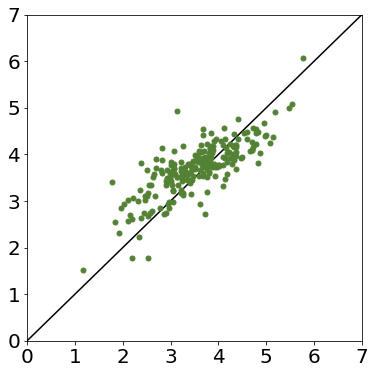

In [7]:
yy_plot(target_dir[0], prefix + 'yyplot')